In [82]:
# Importando as bibliotecas necessárias
import pandas as pd

In [84]:
# Carregando o dataset a partir de um arquivo CSV e exibindo as 5 primeiraslinhas
Dataset = pd.read_csv("/content/MKT.csv", sep = ",")
Dataset.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [85]:
# Mostrando informações sobre o dataset, como número de entradas, colunas e tipos de dados
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [86]:
# Gerando estatísticas descritivas das variáveis numéricas no dataset
Dataset.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [48]:
# Verificando a presença de valores nulos em cada coluna
# Removendo linhas com valores nulos, caso existam
print(Dataset.isnull().sum())
dataset = Dataset.dropna()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64


In [87]:
# Verificando a presença de duplicatas no dataset
# Calculando o IQR (Intervalo Interquartil) para detecção de outliers
# Identificando valores outliers
print(dataset.duplicated().sum())
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()
print(outliers)


0
youtube      0
facebook     0
newspaper    2
sales        0
dtype: int64


In [80]:
# Remover outliers

dataset_no_outliers = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


In [88]:
# Removendo duplicatas do dataset
dataset = dataset.drop_duplicates()

In [89]:
# Verificar o estado do dataset após a limpeza
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [92]:
# Instalação das bibliotecas para visualização de dados
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [50]:
# Importando as bibliotecas de visualização e outras necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [93]:
# Criando um boxplot para identificar outliers nas variáveis de investimento e vendas
fig = px.box(Dataset, x=['youtube', 'facebook', 'newspaper', 'sales'])
fig.update_traces(line_color="blue")

In [94]:
# Exibindo as colunas do dataset
Dataset.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

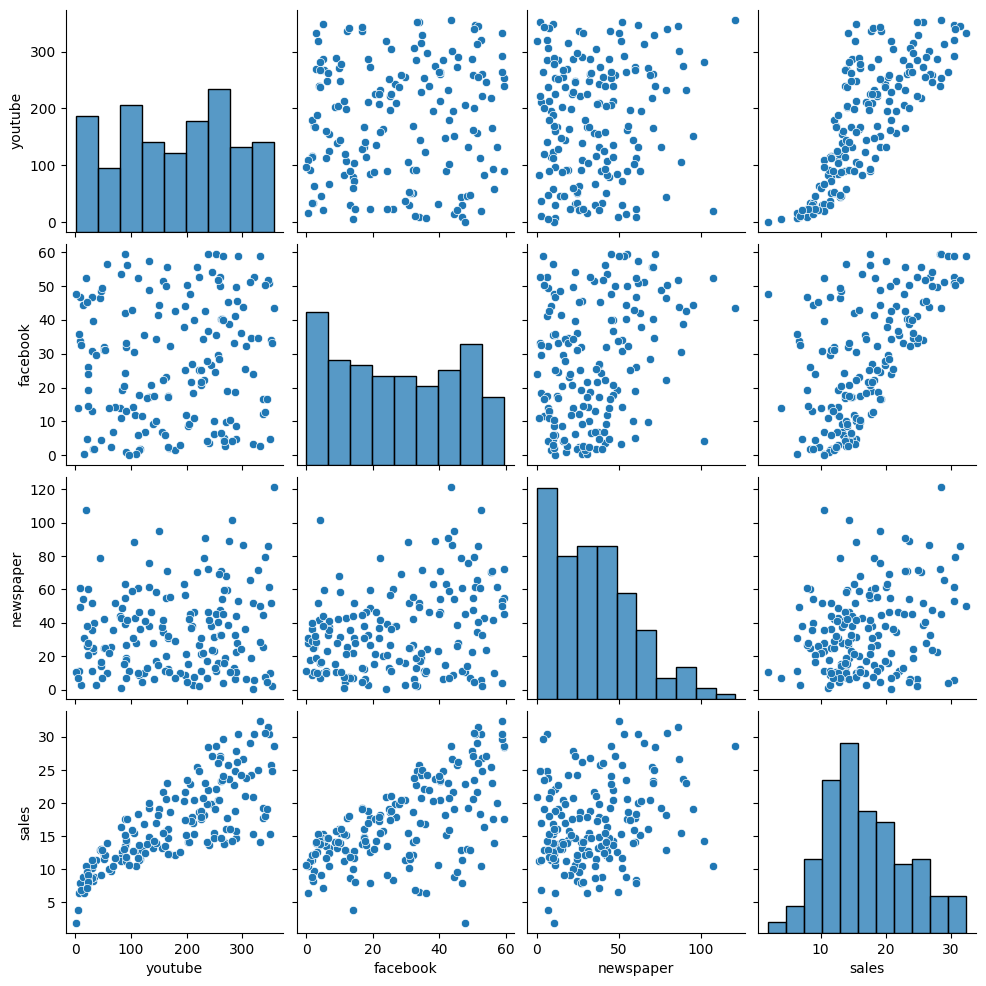

In [96]:
# Criando pairplots para visualizar a relação entre as variáveis
import seaborn as sns
sns.pairplot(Dataset)

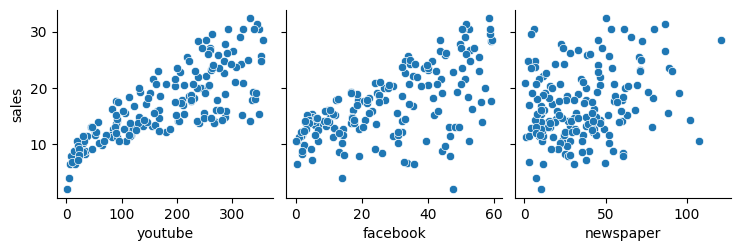

In [97]:
# Criando pairplots especificamente entre os investimentos e as vendas
sns.pairplot(base_casa, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales')

In [98]:
# Calculando a matriz de correlação entre as variáveis
Dataset.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

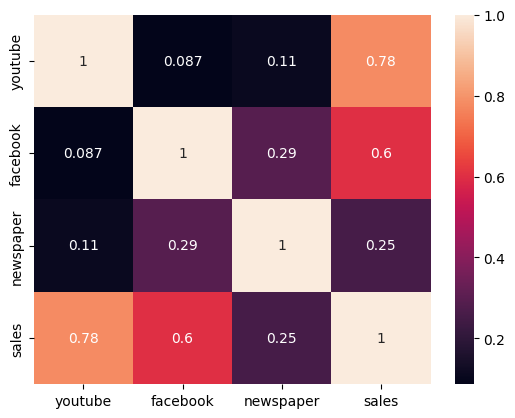

In [99]:
# Criando um mapa de calor (heatmap) para visualizar as correlações
sns.heatmap(Dataset.corr(), annot=True)

<Axes: ylabel='Count'>

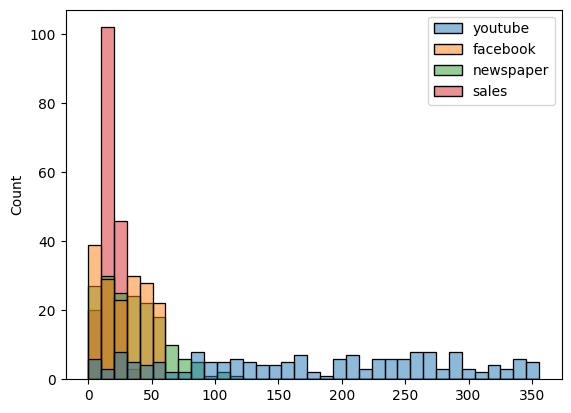

In [100]:
# Criando histogramas para visualizar a distribuição das variáveis de investimento e vendas
sns.histplot(Dataset[['youtube', 'facebook', 'newspaper', 'sales']])


In [101]:
# Separando as variáveis independentes (X) e a variável dependente (Y)
X = Dataset[['youtube', 'facebook', 'newspaper']]
Y = Dataset[['sales']]

In [102]:
# Separando os dados em conjuntos de treino e teste (70% treino, 30% teste)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [103]:
# Exibindo as dimensões dos conjuntos de treino e teste
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [107]:
# Importando e criando um modelo de regressão linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [108]:
# Treinando o modelo com os dados de treino
lm.fit(X_train, Y_train)

LinearRegression()

In [109]:
# Fazendo predições com o conjunto de teste
y_pred = lm.predict(X_test)

In [111]:
# Calculando o coeficiente de determinação (R²) para avaliar o modelo
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


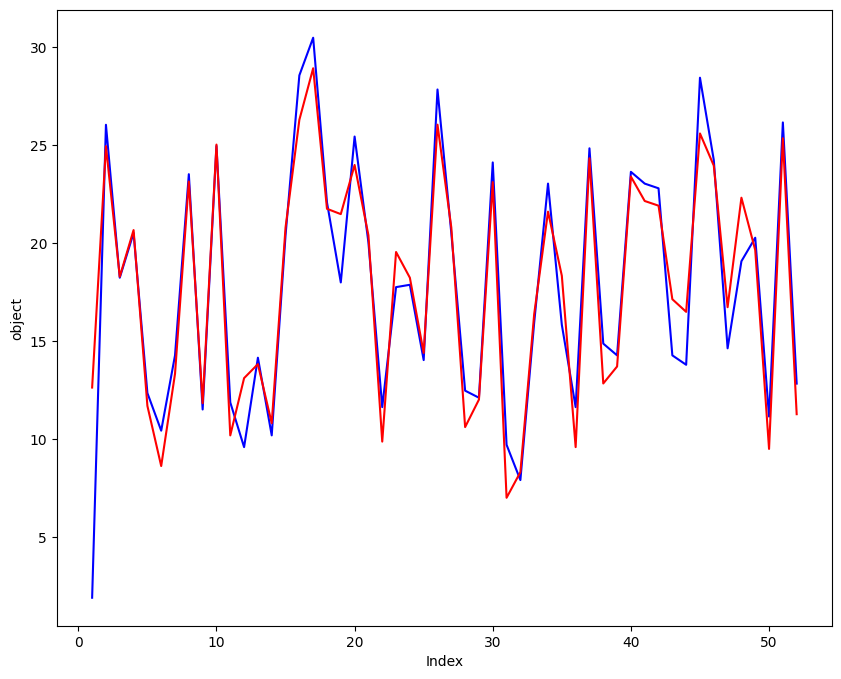

In [112]:
# Plotando as predições versus os valores reais
import matplotlib.pyplot as plt

c = [i for i in range(1, len(Y_test) + 1, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel('Index')
plt.ylabel('object')
plt.show()

In [113]:
# Exibindo as estatísticas descritivas mais uma vez para revisão
Dataset.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000
